# Степанов Никита 6210, лабораторная , 5 вариант

In [2]:
import math
import numpy as np
import sympy as sm
import matplotlib.pyplot as plt
from sympy.plotting.plot import MatplotlibBackend, Plot
%matplotlib
%matplotlib inline

Using matplotlib backend: Qt5Agg


# 1. Используя интерполяционную формулу Лагранжа для неравноотстоящих узлов 

а) построить многочлен Лагранж (вывести формулу)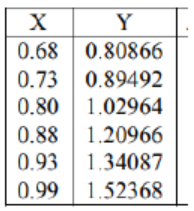

In [3]:
# заменим x на символ
x = sm.Symbol('x')

In [4]:
y = np.array([[0.68, 0.73, 0.80, 0.88, 0.93, 0.99],
              [0.80866, 0.89492, 1.02964, 1.20966, 1.34087, 1.52368]])
X = np.array([0.896, 0.812, 0.774, 0.955, 0.715])
n = np.shape(y)[1]
F = 0
for i in range(n):
    Ln = 1
    for j in range(n):  # вычисляем произведение (1)
        if (i != j):
            Ln *= (x - y[0][j]) / (y[0][i] - y[0][j])
    Ln *= y[1][i]  # домнажаем на yi
    F += Ln  # получаем формулу (2),
    # которая приводит нас к интерполяционному многочлену Лагранжа
# приводим подобные в многочлене
F = sm.expand(F)
F

6.67775348590658*x**5 - 22.9328474016802*x**4 + 33.4856876780686*x**3 - 24.3730958951055*x**2 + 10.0551015498495*x - 1.35520392477883

б) вывести график

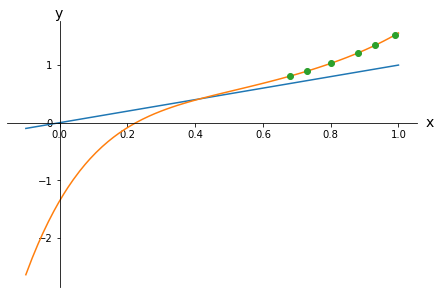

In [5]:
p = sm.plot(x, F, (x, -0.1, 1), show=False)

backend = MatplotlibBackend(p)
backend.process_series()
backend.fig.tight_layout()
fig, ax = backend.fig, backend.ax[0]
#подпись осей
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, x=1.02, rotation=0)

ax.plot(y[0], y[1], 'o')

в) вычислить значения функции при данных значениях аргумента
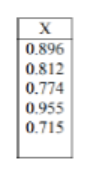

In [6]:
for i in range(len(X)):
    print('F(', X[i], ') =', F.subs(x, X[i]))

F( 0.896 ) = 1.24985176671632
F( 0.812 ) = 1.05467317243473
F( 0.774 ) = 0.977459094243214
F( 0.955 ) = 1.41326934042447
F( 0.715 ) = 0.868265259441618


# 2. Используя первую или вторую интерполяционную формулу Ньютона вычислить указанные значения функции при данных значениях аргумента

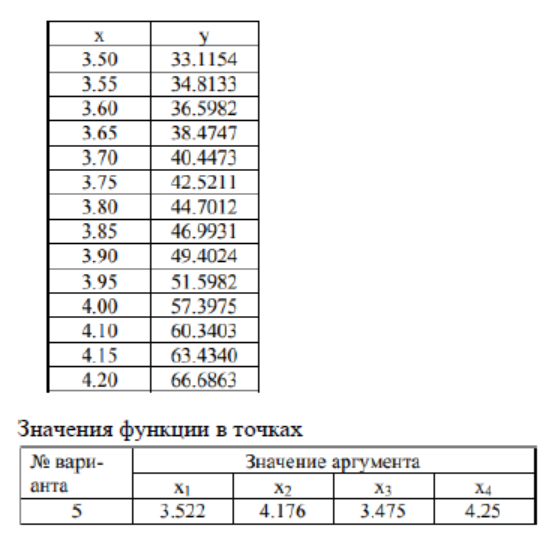

In [16]:
y = np.array([[3.50, 3.55, 3.6, 3.65, 3.7, 3.75, 3.8, 3.85, 3.9, 3.95, 4.0, 4.1, 4.15, 4.2],
              [33.1154, 34.8133, 36.5982, 38.4747, 40.4473, 42.5211, 44.7012, 46.9931, 49.4024, 51.5982, 57.3975, 60.3403, 63.4340, 66.6863]])
#y = np.array([[3.6, 3.65, 3.7, 3.75],
#            [36.598, 38.475, 40.447, 42.521]])
h = y[0][1] - y[0][0]
# h = 0.05  # шаг
k = 3  # порядок
n = np.shape(y)[1]
d = np.zeros((2+k, n), dtype=float)  # таблица конечных разностей
d[:2] = y
for i in range(k):
    for j in range(n-i-1):
        d[2+i][j] = d[1+i][j+1] - d[1+i][j] # таблица разностей
d

array([[ 3.50000e+00,  3.55000e+00,  3.60000e+00,  3.65000e+00,
         3.70000e+00,  3.75000e+00,  3.80000e+00,  3.85000e+00,
         3.90000e+00,  3.95000e+00,  4.00000e+00,  4.10000e+00,
         4.15000e+00,  4.20000e+00],
       [ 3.31154e+01,  3.48133e+01,  3.65982e+01,  3.84747e+01,
         4.04473e+01,  4.25211e+01,  4.47012e+01,  4.69931e+01,
         4.94024e+01,  5.15982e+01,  5.73975e+01,  6.03403e+01,
         6.34340e+01,  6.66863e+01],
       [ 1.69790e+00,  1.78490e+00,  1.87650e+00,  1.97260e+00,
         2.07380e+00,  2.18010e+00,  2.29190e+00,  2.40930e+00,
         2.19580e+00,  5.79930e+00,  2.94280e+00,  3.09370e+00,
         3.25230e+00,  0.00000e+00],
       [ 8.70000e-02,  9.16000e-02,  9.61000e-02,  1.01200e-01,
         1.06300e-01,  1.11800e-01,  1.17400e-01, -2.13500e-01,
         3.60350e+00, -2.85650e+00,  1.50900e-01,  1.58600e-01,
         0.00000e+00,  0.00000e+00],
       [ 4.60000e-03,  4.50000e-03,  5.10000e-03,  5.10000e-03,
         5.50000e-03

In [11]:
def findInd(x): # метод поиска ближайшего приближения
    for i in range(n):
        if math.fabs(x - d[0][i]) <= h/2:
            return i
    if x + h/2 < d[0][0] - h/2:
        return 0
    return n-1


def firstInter(t, index):  # (3)
    s = d[1][index]  # y0
    for i in range(k):
        p = t * d[2+i][index] / math.factorial(i+1)
        for j in range(1, i+1):
            p *= (t - j)
        s += p
    return s


def secondInter(t, index):  # (4)
    s = d[1][index]  # yn
    for i in range(k):
        p = t * d[2+i][index-i-1] / math.factorial(i+1)
        for j in range(1, i+1):
            p *= (t + j)
        s += p
    return s

In [15]:
X = np.array([3.522, 4.176, 3.475, 4.25])
#X = np.array([1.2273, 1.210, 1.253, 1.2638])
for i in range(len(X)):
    index = findInd(X[i])  # индекс y0 в таблице разностей
    t = (X[i] - d[0][index]) / h  # (5)
    #print(d[0][index], t, index)
    # выбираем, какую формулу использовать в зависимости от того,
    # к какому приблежению ближе исходный x
    res = firstInter(t, index) if index < (n-1)/2 else secondInter(t, index)
    print('y(', X[i], ') = ', res)

y( 3.522 ) =  33.85957599999997
y( 4.176 ) =  64.32811039999996
y( 3.475 ) =  32.321124999999974
y( 4.25 ) =  68.87099999999991


# Примечание
(1):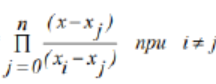
(2):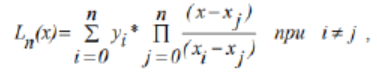
(3):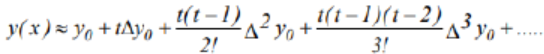
(4):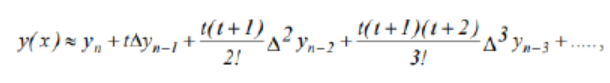
(5):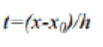